In [57]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import time
import random
import cv2
from tqdm import tqdm
import dgl
import networkx as nx
from torchvision.datasets import VOCSegmentation
from torchvision import transforms
import torchvision.transforms.functional as F

from torchvision.io.image import read_image
from torchvision.models.segmentation import deeplabv3_resnet101,DeepLabV3_ResNet101_Weights
from torchvision.transforms.functional import to_pil_image

In [41]:
weights=DeepLabV3_ResNet101_Weights.DEFAULT
model=deeplabv3_resnet101(weights=weights)
model.eval()

preprocess=weights.transforms()

In [3]:

voc_train=VOCSegmentation('./VOC','2012','train',True)

Using downloaded and verified file: ./VOC\VOCtrainval_11-May-2012.tar
Extracting ./VOC\VOCtrainval_11-May-2012.tar to ./VOC


In [5]:
voc_test=VOCSegmentation('./VOC','2012','val',True)

Using downloaded and verified file: ./VOC\VOCtrainval_11-May-2012.tar
Extracting ./VOC\VOCtrainval_11-May-2012.tar to ./VOC


In [6]:
data=voc_train[0]

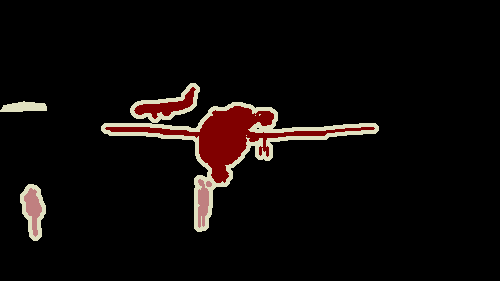

In [10]:
data[0]
data[1]

In [24]:
print(data[1].getpalette())

[0, 0, 0, 128, 0, 0, 0, 128, 0, 128, 128, 0, 0, 0, 128, 128, 0, 128, 0, 128, 128, 128, 128, 128, 64, 0, 0, 192, 0, 0, 64, 128, 0, 192, 128, 0, 64, 0, 128, 192, 0, 128, 64, 128, 128, 192, 128, 128, 0, 64, 0, 128, 64, 0, 0, 192, 0, 128, 192, 0, 0, 64, 128, 128, 64, 128, 0, 192, 128, 128, 192, 128, 64, 64, 0, 192, 64, 0, 64, 192, 0, 192, 192, 0, 64, 64, 128, 192, 64, 128, 64, 192, 128, 192, 192, 128, 0, 0, 64, 128, 0, 64, 0, 128, 64, 128, 128, 64, 0, 0, 192, 128, 0, 192, 0, 128, 192, 128, 128, 192, 64, 0, 64, 192, 0, 64, 64, 128, 64, 192, 128, 64, 64, 0, 192, 192, 0, 192, 64, 128, 192, 192, 128, 192, 0, 64, 64, 128, 64, 64, 0, 192, 64, 128, 192, 64, 0, 64, 192, 128, 64, 192, 0, 192, 192, 128, 192, 192, 64, 64, 64, 192, 64, 64, 64, 192, 64, 192, 192, 64, 64, 64, 192, 192, 64, 192, 64, 192, 192, 192, 192, 192, 32, 0, 0, 160, 0, 0, 32, 128, 0, 160, 128, 0, 32, 0, 128, 160, 0, 128, 32, 128, 128, 160, 128, 128, 96, 0, 0, 224, 0, 0, 96, 128, 0, 224, 128, 0, 96, 0, 128, 224, 0, 128, 96, 128, 128

c:\Users\kisim\anaconda3\envs\GNN_DGL2\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


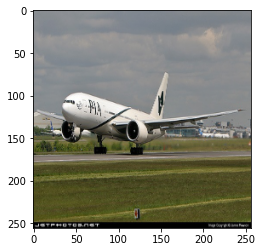

In [34]:
image=read_image('./VOC/VOCdevkit/VOC2012/JPEGImages/2007_000256.jpg')
image=F.resize(image,size=(256,256))
image=np.array(image).transpose(1,2,0)
plt.imshow(image)
plt.show()

c:\Users\kisim\anaconda3\envs\GNN_DGL2\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


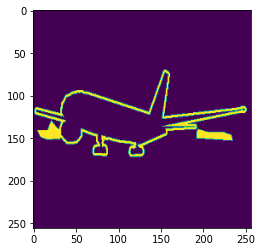

In [38]:
mask=read_image('./VOC/VOCdevkit/VOC2012/SegmentationClass/2007_000256.png')
mask=F.resize(mask,size=(256,256))
mask=np.array(mask).transpose(1,2,0)
mask=np.where()
plt.imshow(mask,vmin=0,vmax=255)
plt.show()

normalized_masks shape: torch.Size([1, 21, 520, 520])


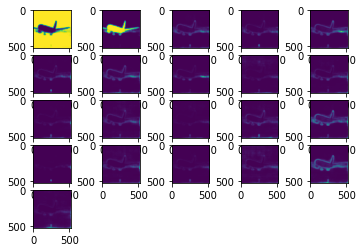

In [55]:
image=read_image('./VOC/VOCdevkit/VOC2012/JPEGImages/2007_000256.jpg')
image=F.resize(image,size=(256,256))
batch=preprocess(image).unsqueeze(0)

prediction=model(batch)['out']
normalized_masks=prediction.softmax(dim=1)
print(f'normalized_masks shape: {normalized_masks.shape}')
class_to_idx={cls: idx for (idx,cls) in enumerate(weights.meta["categories"])}
for num,i in enumerate(normalized_masks[0]):
    img=np.array(i.detach())
    plt.subplot(5,5,num+1)
    plt.imshow(img)
plt.show()

In [58]:
mask=normalized_masks[0,class_to_idx['aeroplane']]
to_pil_image(mask).show()

In [56]:
for j in class_to_idx:
    print(j)

__background__
aeroplane
bicycle
bird
boat
bottle
bus
car
cat
chair
cow
diningtable
dog
horse
motorbike
person
pottedplant
sheep
sofa
train
tvmonitor
